In [13]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from datetime import datetime
from datetime import date
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#for word embedding
#use this #use this "conda install -c conda-forge genism" or pip install genism
import gensim
from gensim.models import Word2Vec

from adjustText import adjust_text

In [14]:
df = pd.read_csv("GitHub_Projects.csv")
updated = pd.to_datetime(df["updated_at"]).dt.date
created = pd.to_datetime(df["created_at"]).dt.date
days = updated-created
days = pd.to_numeric(days.dt.days, downcast='integer')
df["updated-created"] = days 
data = df[["repo_name", "Description", "stargazers_count", "forks_count", "num_model_file", "updated-created"]]
data.head()

,repo_name,Description,stargazers_count,forks_count,num_model_file,updated-created
0,ECAN_dspic,An ECAN library for the dsPIC33f in both C and...,0,7,3,2459
1,truetime,TrueTime is a Matlab/Simulink-based simulator ...,4,18,22,3085
2,launchpad_ert,Simulink (Embedded Coder) Target for TI LaunchPad,7,5,11,2684
3,osx-sl-joystick,Access Joysticks in Simulink on OSX,1,0,1,545
4,simulink-rtl-sdr,An Open Source Software Package that enables o...,27,17,2,2415


In [15]:
data1 = data[["stargazers_count", "forks_count", "num_model_file", "updated-created"]]
# data.to_csv("numerical_cluster.csv")

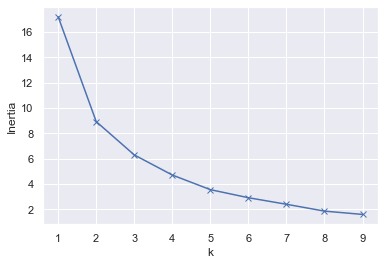

In [16]:
#inspired from https://www.kaggle.com/ellecf/visualizing-multidimensional-clusters
scaler = preprocessing.MinMaxScaler()
features_normal = scaler.fit_transform(data1)
inertia = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(features_normal)
    kmeanModel.fit(features_normal)
    inertia.append(kmeanModel.inertia_)
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

In [17]:
#from the above elbow method we got the number of clusters to be 2 as the elbow is forming at k=2
kmeans = KMeans(n_clusters=2).fit(features_normal)
labels = pd.DataFrame(kmeans.labels_)
df["numeric_cluster"] = labels
onlynumericclusters = pd.concat((data1,labels),axis=1)
onlynumericclusters = onlynumericclusters.rename({0:'labels'},axis=1)
onlynumericclusters.head()

,stargazers_count,forks_count,num_model_file,updated-created,labels
0,0,7,3,2459,1
1,4,18,22,3085,1
2,7,5,11,2684,1
3,1,0,1,545,0
4,27,17,2,2415,1


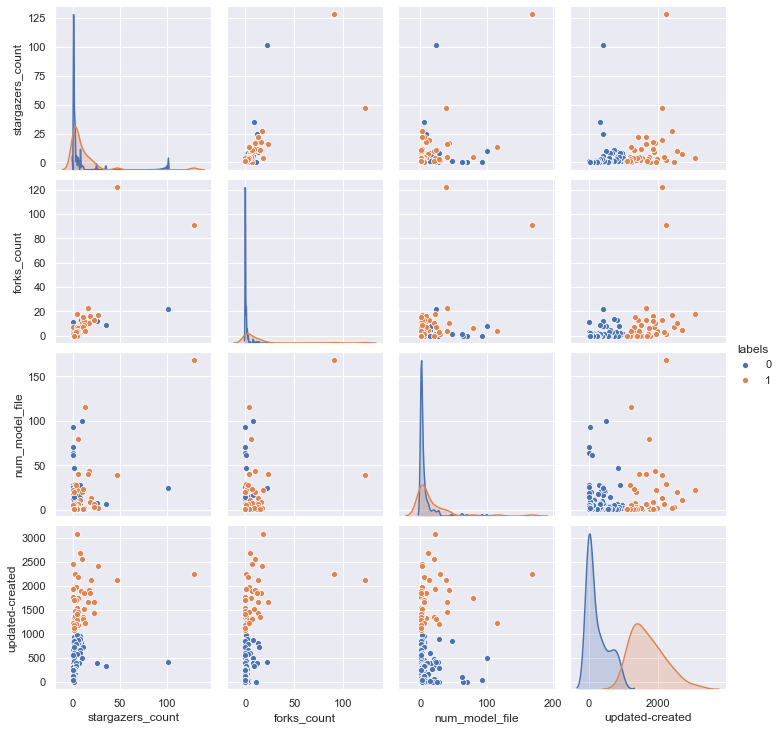

In [18]:
sns.pairplot(onlynumericclusters,hue='labels')

In [19]:
df.head()

,id,repo_name,owner_name,is_private,project_url,Description,is_forked,api_url,created_at,updated_at,...,open_issues_count,master_branch,default_branch,Topics,license,model_files,num_model_file,version_sha,updated-created,numeric_cluster
0,789683,ECAN_dspic,Susurrus,0,https://github.com/Susurrus/ECAN_dspic,An ECAN library for the dsPIC33f in both C and...,0,https://api.github.com/repos/Susurrus/ECAN_dspic,2010-07-21 21:39:55.000000,2017-04-14 04:08:40.000000,...,1,NaN,master,NaN,"BSD 2-Clause ""Simplified"" License","ECAN_dspic-master/ecan_dspic.mdl,ECAN_dspic-ma...",3,0051e8902eaf3ba07811c8c1753120d894772937,2459,1
1,919495,truetime,sfischme,0,https://github.com/sfischme/truetime,TrueTime is a Matlab/Simulink-based simulator ...,0,https://api.github.com/repos/sfischme/truetime,2010-09-17 21:41:34.000000,2019-02-27 09:29:27.000000,...,1,NaN,master,NaN,GNU General Public License v3.0,"truetime-master/kernel/ttNCM_Wrapper.mdl,truet...",22,d1a288960def71acdf2e8a21ae47aa6d69336fab,3085,1
2,4608325,launchpad_ert,kyak,0,https://github.com/kyak/launchpad_ert,Simulink (Embedded Coder) Target for TI LaunchPad,0,https://api.github.com/repos/kyak/launchpad_ert,2012-06-09 15:47:56.000000,2019-10-15 12:09:18.000000,...,0,NaN,master,NaN,Other,launchpad_ert-master/demos/tilp_pil_system.mdl...,11,4b004e42d8736ca807530ae3f3132196477a5181,2684,1
3,4790726,osx-sl-joystick,zprime,0,https://github.com/zprime/osx-sl-joystick,Access Joysticks in Simulink on OSX,0,https://api.github.com/repos/zprime/osx-sl-joy...,2012-06-26 04:02:54.000000,2013-12-23 08:33:48.000000,...,0,NaN,master,NaN,Other,"osx-sl-joystick-master/bin/osx_joystick.mdl,",1,35b428b88f1a1a759fe9bcbe4511da9577f42dab,545,0
4,5480060,simulink-rtl-sdr,kit-cel,0,https://github.com/kit-cel/simulink-rtl-sdr,An Open Source Software Package that enables o...,0,https://api.github.com/repos/kit-cel/simulink-...,2012-08-20 10:54:52.000000,2019-04-01 13:00:02.000000,...,1,NaN,master,NaN,GNU General Public License v3.0,simulink-rtl-sdr-master/demo/rtlsdr_spectrum_s...,2,3fefdd32f0f57a1c6de3d00ad999941593447bae,2415,1


In [20]:
#Text preprocessing code from: https://medium.com/analytics-vidhya/nlp-tutorial-for-text-classification-in-python-8f19cd17b49e
def preprocess(text):
    text = text.lower() 
    text=text.strip()  
    text=re.compile('<.*?>').sub('', text) 
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  
    text = re.sub('\s+', ' ', text)  
    text = re.sub(r'\[[0-9]*\]',' ',text) 
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) 
    text = re.sub(r'\s+',' ',text) 
    return text

 
# STOPWORD REMOVAL
def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)
#LEMMATIZATION
# Initialize the lemmatizer
wl = WordNetLemmatizer()
 
# This is a helper function to map NTLK position tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
# Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)
def finalpreprocess(string):
    return lemmatizer(stopword(preprocess(string)))

#adding description word count as one more attribute to cluster
df["desc_word_count"] = df["Description"].apply(lambda x: len(str(x).split()))
#using the above preprocessing to convert all the descriptions to base form words.
df["clean_description"] = df["Description"].apply(lambda x: finalpreprocess(x))
#print( df["Description"][0], df["desc_word_count"][0]) 

#Word2Vec
# Word2Vec runs on tokenized sentences
df["clean_description_tokens"] = [nltk.word_tokenize(i) for i in df["clean_description"]] 

#Tf-Idf
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
description_vectors_tfidf = tfidf_vectorizer.fit_transform(df["clean_description"])

#Word2Vec model
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(next(iter(word2vec.values())))
    def fit(self, X, y):
        return self
    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])
model = Word2Vec(df['clean_description_tokens'],min_count=1)
w2v = dict(zip(model.wv.index2word, model.wv.vectors))     
modelw = MeanEmbeddingVectorizer(w2v)
description_vectors_w2v = modelw.transform(df["clean_description_tokens"])

In [21]:

print(description_vectors_w2v.shape)
print(df.shape)
print(type(description_vectors_w2v))
print(type(df))
#print(description_vectors_w2v)
print(model.vector_size)


(225, 100)
(225, 30)
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
100


In [22]:
# Inspired from https://towardsdatascience.com/using-word2vec-to-analyze-news-headlines-and-predict-article-success-cdeda5f14751
# Create a list of strings, one for each description
desc_list = [desc for desc in df["Description"]]
# Collapse the list of strings into a single long string for processing
big_desc_string = ''.join(desc_list)
# Tokenize the string into words
tokens = word_tokenize(big_desc_string)
# Remove non-alphabetic tokens, such as punctuation
words = [word.lower() for word in tokens if word.isalpha()]
# Filter out stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
words = [word for word in words if not word in stop_words]

vector_list = [model[word] for word in words if word in model.wv.vocab]
# Create a list of the words corresponding to these vectors
words_filtered = [word for word in words if word in model.wv.vocab]
# Zip the words together with their vector representations
word_vec_zip = zip(words_filtered, vector_list)
# Cast to a dict so we can turn it into a DataFrame
word_vec_dict = dict(word_vec_zip)
df1 = pd.DataFrame.from_dict(word_vec_dict, orient='index')
df1.head(3)
# print(model)
# print(list(model.wv.vocab))

<ipython-input-22-73be41cb77bd>:15: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  vector_list = [model[word] for word in words if word in model.wv.vocab]


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
ecan,-0.003292,0.004548,-0.000680,-0.001948,0.003458,0.002927,0.003384,0.002815,-0.003458,0.001892,...,0.002590,-0.003503,0.003208,-0.000965,-0.000765,0.002718,0.001743,-0.004777,0.000621,0.002915
library,0.003753,-0.003219,0.004655,0.003252,0.003881,-0.003705,0.001455,0.003671,0.001053,0.003379,...,0.002182,0.004261,-0.001941,0.002494,0.001389,0.004884,-0.003663,-0.002112,0.002737,0.004402
c,-0.003287,-0.004588,-0.000223,-0.004428,-0.000251,0.004552,-0.004609,0.005043,-0.003771,0.001164,...,-0.002420,-0.003412,-0.004194,0.000060,-0.002403,0.001782,0.004462,0.000388,-0.000877,-0.001753


In [23]:
from sklearn.manifold import TSNE

# Initialize t-SNE
tsne = TSNE(n_components = 2, init = 'random', random_state = 10, perplexity = 100)
tsne_df = tsne.fit_transform(df1)

In [24]:
tsne_df.shape


(672, 2)

[Text(0.7693162, 1.5882367, 'ecan'), Text(1.7660732, 0.6325541, 'source'), Text(2.1564665, -0.066624045, 'universal'), Text(1.2178348, -1.386592, 'stellaris'), Text(-0.5840049, -1.2782824, 'modeling'), Text(0.9093439, -0.45430785, 'keywords'), Text(-0.9067113, -0.87942654, 'turbofan'), Text(-0.13020505, 1.3936266, 'state'), Text(0.99926233, 1.8056008, 'communication'), Text(-0.10235502, 0.86714923, 'communicate'), Text(0.7657187, -1.6433786, 'also'), Text(2.5598745, 0.28858534, 'specification'), Text(0.685754, 0.53190213, 'rich'), Text(-0.701548, -0.42401, 'contains'), Text(1.6856805, 0.43412343, 'einer'), Text(0.87698054, -1.0146123, 'visualize'), Text(1.5364354, -0.94154555, 'application'), Text(-1.2195153, -0.2751867, 'scara'), Text(-0.7301475, 0.6508487, 'repo'), Text(0.12342089, 1.9649069, 'via'), Text(0.43733072, 0.52085346, 'stability'), Text(0.68521416, -0.9210671, 'lunar'), Text(-0.9951572, -0.99040765, 'read')]


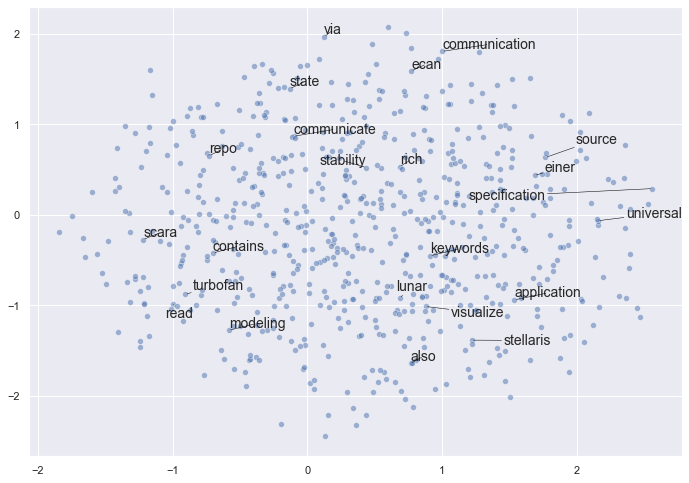

In [25]:
sns.set()
# Initialize figure
fig, ax = plt.subplots(figsize = (11.7, 8.27))
sns.scatterplot(tsne_df[:, 0], tsne_df[:, 1], alpha = 0.5)

# Import adjustText, initialize list of texts
#use this "conda install -c conda-forge adjusttext" or pip install adjusttext

texts = []
words_to_plot = list(np.arange(0, 225, 10))

# Append words to list
for word in words_to_plot:
    texts.append(plt.text(tsne_df[word, 0], tsne_df[word, 1], df1.index[word], fontsize = 14))
print(texts)
# Plot text using adjust_text (because overlapping text is hard to read)
adjust_text(texts, force_points = 0.4, force_text = 0.4, 
            expand_points = (2,1), expand_text = (1,2),
            arrowprops = dict(arrowstyle = "-", color = 'black', lw = 0.5))

plt.show()